## 02_EDA

In [84]:
import warnings
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._core")

# Color palete
color_palette = {
    "white": "#FFFFFF",
    "black": "#000000",
    "github_backborund": "#0D1117"}

sns.set_theme(style="whitegrid")

# Importar y transformar sig data
usa_states = pd.read_csv("data/usa_states.csv")
usa_cities = pd.read_csv("data/usa_cities.csv")

In [85]:
sig_states = gpd.read_file("data/sig/Estados/Estados_Unidos_Estados.shp")
sig_cities = gpd.read_file("data/sig/Ciudades/Estados_Unidos_Poblaciones.shp")
sig_routes = gpd.read_file("data/sig/Vialidad/Estados_Unidos_Vialidad.shp")
sig_hidrography = gpd.read_file("data/sig/Hidrografia/Estados_Unidos_Hidrografia.shp")

sig_california = sig_states[sig_states["STATE_NAME"] == "California"]
sig_florida = sig_states[sig_states["STATE_NAME"] == "Florida"]
sig_newyork = sig_states[sig_states["STATE_NAME"] == "New York"]
sig_utah = sig_states[sig_states["STATE_NAME"] == "Utah"]

In [89]:
#usa_states = gpd.GeoDataFrame(usa_states, geometry="geometry")
import geopandas as gpd
from shapely.geometry import Point

# Supongamos que usa_cities es tu DataFrame con columnas 'latitude' y 'longitude'
usa_cities['geometry'] = usa_cities.apply(lambda row: Point(row.longitude, row.latitude), axis=1)

# Crea el GeoDataFrame usando la columna 'geometry'
usa_cities_gdf = gpd.GeoDataFrame(usa_cities, geometry='geometry')
usa_cities_gdf.crs = "EPSG:4326"
usa_cities = gpd.GeoDataFrame(usa_cities, geometry="geometry")

Utah population distribution

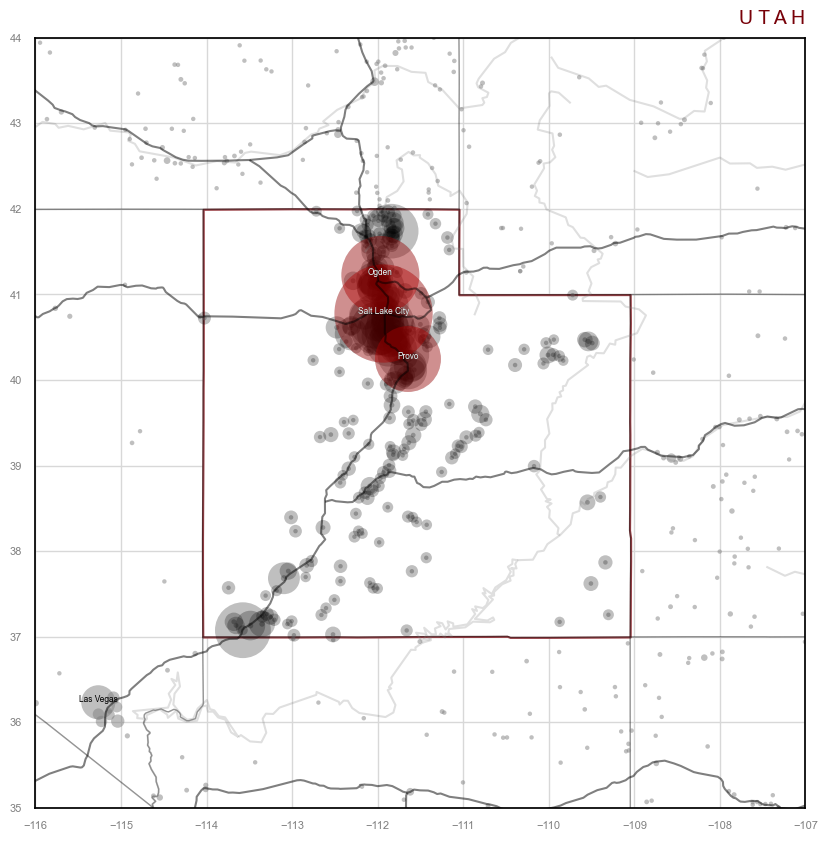

In [90]:
title = "U T A H"
fig, ax = plt.subplots(figsize=(10, 10))

# Define a range of sizes for the markers
min_size = usa_cities['population'].min()
max_size = usa_cities['population'].max()
size_range = (10, 5000)  # Define the desired range of marker sizes
normalized_sizes = (usa_cities['population'] - min_size) / (max_size - min_size)
usa_cities['normalized_population'] = size_range[0] + normalized_sizes * (size_range[1] - size_range[0])

sig_utah.plot(ax=ax, color="white", edgecolor="#780109", alpha=1, markersize=10, linewidth=1.5)
sig_hidrography.plot(ax=ax, color="gray", edgecolor="none", alpha=0.25, markersize=10)
sig_routes.plot(ax=ax, color="black", edgecolor="none", alpha=0.5, markersize=10)
sig_states.plot(ax=ax, color="white", edgecolor="black", alpha=0.25, markersize=10)
usa_cities.plot(ax=ax, color="gray", edgecolor="none", alpha=0.5, markersize=usa_cities['normalized_population'])
usa_cities[usa_cities["state_id"] == "UT"].plot(ax=ax, color="black", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])
usa_cities[(usa_cities["state_id"] == "UT") & (usa_cities["population"] > 500000)].plot(ax=ax, color="red", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])

# Anotar el nombre de las ciudades con más de un millón de habitantes
for idx, row in usa_cities[usa_cities["population"] > 500000].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="black", fontsize=6, ha='center')
for idx, row in usa_cities[(usa_cities["state_id"] == "UT") & (usa_cities["population"] > 500000)].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="white", fontsize=6, ha='center')

ax.set_xlim([-116, -107]) # set latitud range
ax.set_ylim([35, 44]) # set longnitud range

plt.xticks(fontsize=8, color="gray")
plt.yticks(fontsize=8, color="gray")
plt.title(title, fontsize=14, loc='right', color="#780109", pad=10)

# Asignar color a las líneas que delimitan el área del gráfico
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

fig.savefig(f"gallery/{title}_daymode.jpg", format='jpg', dpi=300, bbox_inches='tight')
fig.show()

In [51]:
utah_hotels = pd.read_csv("data/utah_hotels.csv")
utah_attractions = pd.read_csv("data/utah_attractions.csv")

In [97]:
count = utah_hotels.groupby("city")["name"].count()
utah_hotel_count = pd.DataFrame(count.reset_index())
utah_hotel_count.columns = ["city", "hotel_count"]
utah_hotel_count = pd.merge(utah_hotel_count, usa_cities[usa_cities["state_id"] == "UT"], on="city", how="left")

utah_hotel_count = gpd.GeoDataFrame(utah_hotel_count, geometry='geometry')
utah_hotel_count.crs = "EPSG:4326"
utah_hotel_count = gpd.GeoDataFrame(utah_hotel_count, geometry="geometry")
utah_hotel_count

,city,hotel_count,city_id,county,state_id,population,density,latitude,longitude,zips,geometry,normalized_population
0,Logan,292,354.0,Cache,UT,121666,1124.7,41.7399,-111.8422,84321 84322 84341,POINT (-111.84220 41.73990),42.107775
1,Ogden,33,67.0,Weber,UT,622918,1206.8,41.2279,-111.9682,84404 84401 84403 84408 84244 84407 84409 84415,POINT (-111.96820 41.22790),174.388665
2,Provo,81,68.0,Utah,UT,619218,1051.2,40.2457,-111.6457,84606 84604 84602 84601 84603 84605,POINT (-111.64570 40.24570),173.412231
3,Salt Lake City,138,40.0,Salt Lake,UT,1173879,693.4,40.7776,-111.9311,84116 84115 84114 84113 84112 84111 84128 8415...,POINT (-111.93110 40.77760),319.787807
4,St. George,236,293.0,Washington,UT,148895,464.8,37.0758,-113.5752,84770 84790 84791,POINT (-113.57520 37.07580),49.293535
5,West Jordan,251,372.0,Salt Lake,UT,116045,1386.4,40.6024,-112.0008,84088 84081 84084,POINT (-112.00080 40.60240),40.624388
6,West Valley City,262,312.0,Salt Lake,UT,139361,1501.9,40.6886,-112.0123,84119 84120 84128 84118 84125 84126 84127 8413...,POINT (-112.01230 40.68860),46.777503


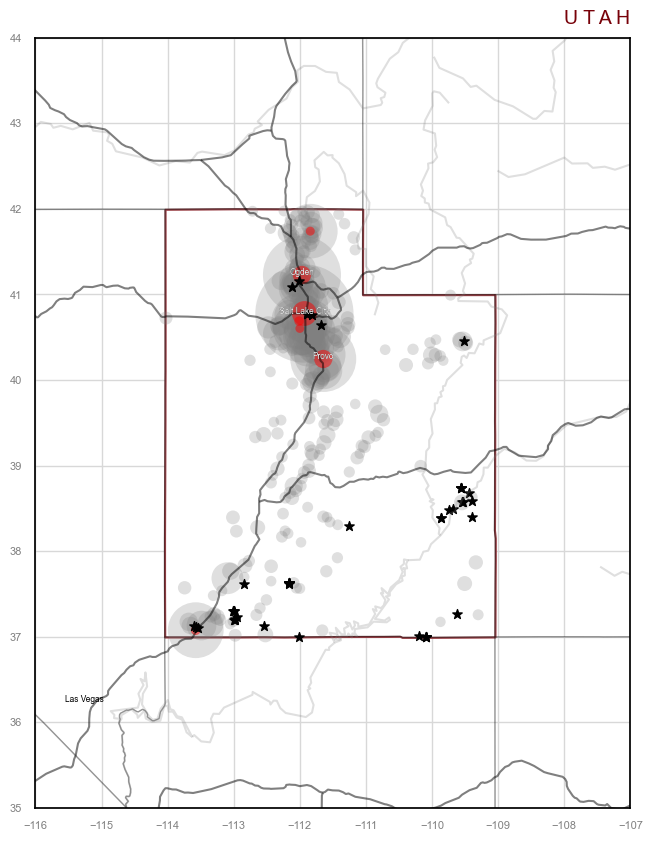

In [98]:
title = "U T A H"
fig, ax = plt.subplots(figsize=(10, 10))

# Define a range of sizes for the markers
min_size = usa_cities['population'].min()
max_size = usa_cities['population'].max()
size_range = (10, 5000)  # Define the desired range of marker sizes
normalized_sizes = (usa_cities['population'] - min_size) / (max_size - min_size)
usa_cities['normalized_population'] = size_range[0] + normalized_sizes * (size_range[1] - size_range[0])

sig_utah.plot(ax=ax, color="white", edgecolor="#780109", alpha=1, markersize=10, linewidth=1.5)
sig_hidrography.plot(ax=ax, color="gray", edgecolor="none", alpha=0.25, markersize=10)
sig_routes.plot(ax=ax, color="black", edgecolor="none", alpha=0.5, markersize=10)
sig_states.plot(ax=ax, color="white", edgecolor="black", alpha=0.25, markersize=10)
#usa_cities.plot(ax=ax, color="gray", edgecolor="none", alpha=0.5, markersize=usa_cities['normalized_population'])
usa_cities[usa_cities["state_id"] == "UT"].plot(ax=ax, color="gray", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])
#usa_cities[(usa_cities["state_id"] == "UT") & (usa_cities["population"] > 100000)].plot(ax=ax, color="red", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])
utah_hotel_count.plot(ax=ax, color="red", edgecolor="none", alpha=0.5, markersize=utah_hotel_count['normalized_population'])

# Anotar el nombre de las ciudades con más de un millón de habitantes
for idx, row in usa_cities[usa_cities["population"] > 500000].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="black", fontsize=6, ha='center')
for idx, row in usa_cities[(usa_cities["state_id"] == "UT") & (usa_cities["population"] > 500000)].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="white", fontsize=6, ha='center')

# Añadir marcadores para las atracciones
ax.scatter(utah_attractions['longitude'], utah_attractions['latitud'], color='black', marker='*', s=50, label='Attractions')

ax.set_xlim([-116, -107]) # set latitud range
ax.set_ylim([35, 44]) # set longnitud range

plt.xticks(fontsize=8, color="gray")
plt.yticks(fontsize=8, color="gray")
plt.title(title, fontsize=14, loc='right', color="#780109", pad=10)

# Asignar color a las líneas que delimitan el área del gráfico
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

fig.savefig(f"gallery/{title}_daymode.jpg", format='jpg', dpi=300, bbox_inches='tight')
fig.show()

In [49]:
title = "U T A H"
fig, ax = plt.subplots(figsize=(10, 10))

# Define a range of sizes for the markers
min_size = usa_cities['population'].min()
max_size = usa_cities['population'].max()
size_range = (10, 5000)  # Define the desired range of marker sizes
normalized_sizes = (usa_cities['population'] - min_size) / (max_size - min_size)
usa_cities['normalized_population'] = size_range[0] + normalized_sizes * (size_range[1] - size_range[0])

sig_utah.plot(ax=ax, color="white", edgecolor="#780109", alpha=1, markersize=10, linewidth=1.5)
sig_hidrography.plot(ax=ax, color="gray", edgecolor="none", alpha=0.25, markersize=10)
sig_routes.plot(ax=ax, color="black", edgecolor="none", alpha=0.5, markersize=10)
sig_states.plot(ax=ax, color="white", edgecolor="black", alpha=0.25, markersize=10)
usa_cities.plot(ax=ax, color="gray", edgecolor="none", alpha=0.5, markersize=usa_cities['normalized_population'])
usa_cities[usa_cities["state_id"] == "UT"].plot(ax=ax, color="black", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])
usa_cities[(usa_cities["state_id"] == "UT") & (usa_cities["population"] > 100000)].plot(ax=ax, color="red", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])

# utah_attractions

# Anotar el nombre de las ciudades con más de un millón de habitantes
for idx, row in usa_cities[usa_cities["population"] > 500000].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="black", fontsize=6, ha='center')
for idx, row in usa_cities[(usa_cities["state_id"] == "UT") & (usa_cities["population"] > 500000)].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="white", fontsize=6, ha='center')

# Añadir marcadores para las atracciones de Utah
ax.scatter(utah_attractions['longitude'], utah_attractions['latitud'], color='black', marker='*', s=50, label='Attractions')
# Etiquetar las atracciones
#for idx, row in utah_attractions.iterrows():
#    ax.annotate(row['attraction'], (row['longitude'], row['latitud']), color='blue', fontsize=6, ha='right', va='bottom')


ax.set_xlim([-116, -107]) # set latitud range
ax.set_ylim([35, 44]) # set longnitud range

plt.xticks(fontsize=8, color="gray")
plt.yticks(fontsize=8, color="gray")
plt.title(title, fontsize=14, loc='right', color="#780109", pad=10)

# Asignar color a las líneas que delimitan el área del gráfico
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

fig.savefig(f"gallery/{title}_daymode.jpg", format='jpg', dpi=300, bbox_inches='tight')
fig.show()

California population distribution

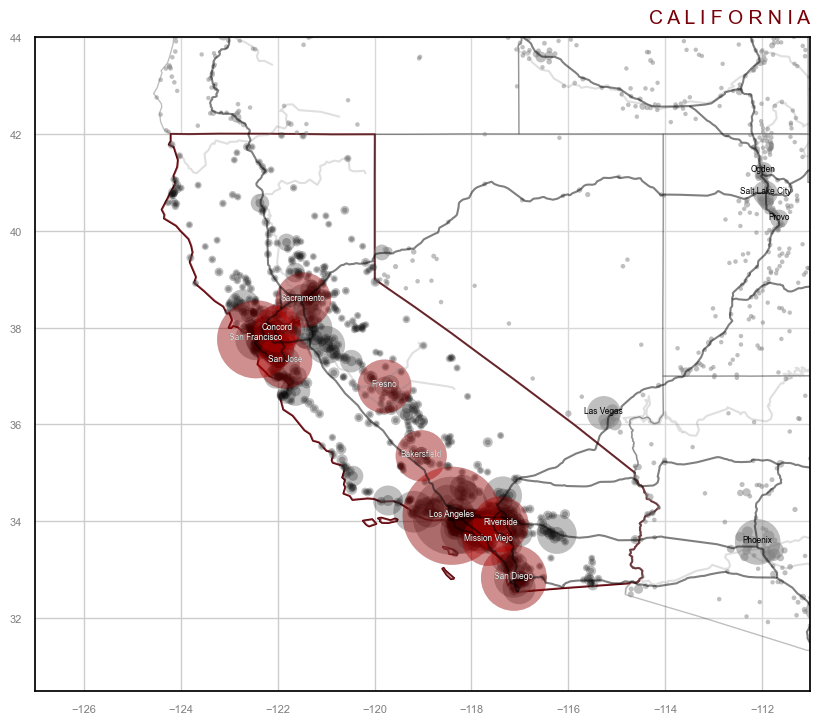

In [15]:
title = "C A L I F O R N I A"
fig, ax = plt.subplots(figsize=(10, 10))

# Define a range of sizes for the markers
min_size = usa_cities['population'].min()
max_size = usa_cities['population'].max()
size_range = (10, 5000)  # Define the desired range of marker sizes
normalized_sizes = (usa_cities['population'] - min_size) / (max_size - min_size)
usa_cities['normalized_population'] = size_range[0] + normalized_sizes * (size_range[1] - size_range[0])

sig_california.plot(ax=ax, color="white", edgecolor="#780109", alpha=1, markersize=10, linewidth=1.5)
sig_hidrography.plot(ax=ax, color="gray", edgecolor="none", alpha=0.25, markersize=10)
sig_routes.plot(ax=ax, color="black", edgecolor="none", alpha=0.5, markersize=10)
sig_states.plot(ax=ax, color="white", edgecolor="black", alpha=0.25, markersize=10)
usa_cities.plot(ax=ax, color="gray", edgecolor="none", alpha=0.5, markersize=usa_cities['normalized_population'])
usa_cities[usa_cities["state_id"] == "CA"].plot(ax=ax, color="black", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])
usa_cities[(usa_cities["state_id"] == "CA") & (usa_cities["population"] > 500000)].plot(ax=ax, color="red", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])

# Anotar el nombre de las ciudades con más de un millón de habitantes
for idx, row in usa_cities[usa_cities["population"] > 500000].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="black", fontsize=6, ha='center')
for idx, row in usa_cities[(usa_cities["state_id"] == "CA") & (usa_cities["population"] > 500000)].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="white", fontsize=6, ha='center')

ax.set_xlim([-127, -111]) # set latitud range
ax.set_ylim([30.5, 44]) # set longnitud range

plt.xticks(fontsize=8, color="gray")
plt.yticks(fontsize=8, color="gray")
plt.title(title, fontsize=14, loc='right', color="#780109", pad=10)

# Asignar color a las líneas que delimitan el área del gráfico
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

fig.savefig(f"gallery/{title}_daymode.jpg", format='jpg', dpi=300, bbox_inches='tight')
fig.show()

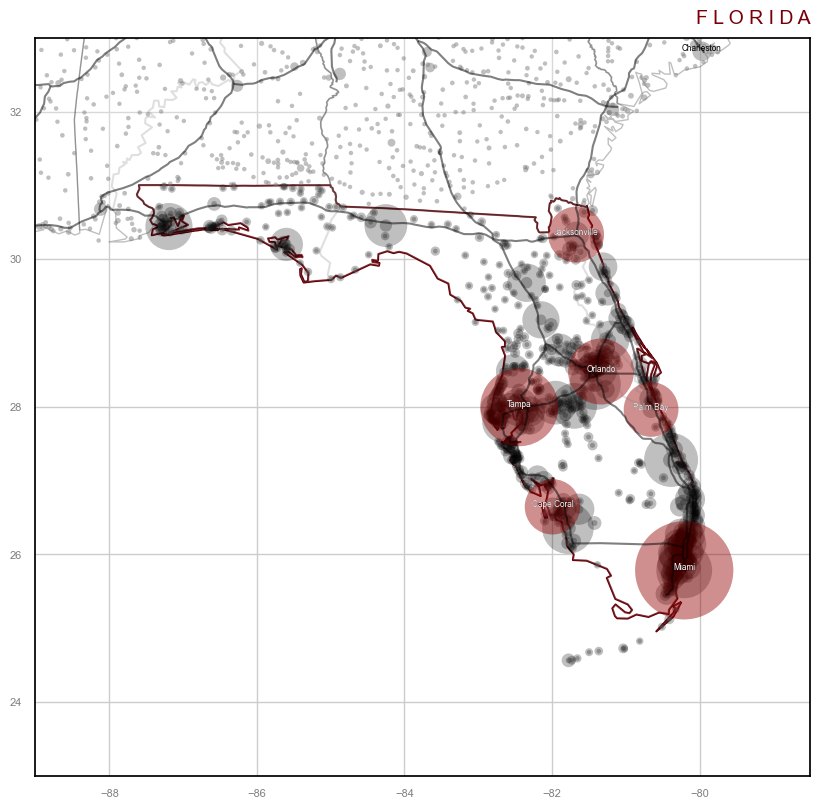

In [14]:
title = "F L O R I D A"
fig, ax = plt.subplots(figsize=(10, 10))

# Define a range of sizes for the markers
min_size = usa_cities['population'].min()
max_size = usa_cities['population'].max()
size_range = (10, 5000)  # Define the desired range of marker sizes
normalized_sizes = (usa_cities['population'] - min_size) / (max_size - min_size)
usa_cities['normalized_population'] = size_range[0] + normalized_sizes * (size_range[1] - size_range[0])

sig_florida.plot(ax=ax, color="white", edgecolor="#780109", alpha=1, markersize=10, linewidth=1.5)
sig_hidrography.plot(ax=ax, color="gray", edgecolor="none", alpha=0.25, markersize=10)
sig_routes.plot(ax=ax, color="black", edgecolor="none", alpha=0.5, markersize=10)
sig_states.plot(ax=ax, color="white", edgecolor="black", alpha=0.25, markersize=10)
usa_cities.plot(ax=ax, color="gray", edgecolor="none", alpha=0.5, markersize=usa_cities['normalized_population'])
usa_cities[usa_cities["state_id"] == "FL"].plot(ax=ax, color="black", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])
usa_cities[(usa_cities["state_id"] == "FL") & (usa_cities["population"] > 500000)].plot(ax=ax, color="red", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])

# Anotar el nombre de las ciudades con más de un millón de habitantes
for idx, row in usa_cities[usa_cities["population"] > 500000].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="black", fontsize=6, ha='center')
for idx, row in usa_cities[(usa_cities["state_id"] == "FL") & (usa_cities["population"] > 500000)].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="white", fontsize=6, ha='center')

ax.set_xlim([-89, -78.5]) # set latitud range
ax.set_ylim([23, 33]) # set longnitud range

plt.xticks(fontsize=8, color="gray")
plt.yticks(fontsize=8, color="gray")
plt.title(title, fontsize=14, loc='right', color="#780109", pad=10)

# Asignar color a las líneas que delimitan el área del gráfico
ax.spines['bottom'].set_color('black')  
ax.spines['top'].set_color('black')   
ax.spines['left'].set_color('black')    
ax.spines['right'].set_color('black') 

fig.savefig(f"gallery/{title}_daymode.jpg", format='jpg', dpi=300, bbox_inches='tight')
fig.show()

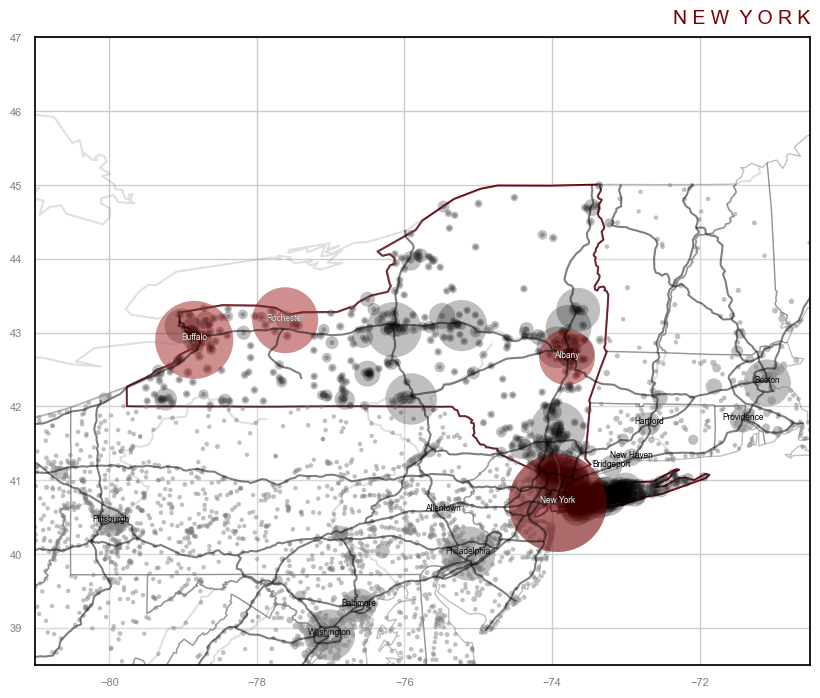

In [16]:
title = "N E W  Y O R K"
fig, ax = plt.subplots(figsize=(10, 10))

# Define a range of sizes for the markers
min_size = usa_cities['population'].min()
max_size = usa_cities['population'].max()
size_range = (10, 5000)  # Define the desired range of marker sizes
normalized_sizes = (usa_cities['population'] - min_size) / (max_size - min_size)
usa_cities['normalized_population'] = size_range[0] + normalized_sizes * (size_range[1] - size_range[0])

sig_newyork.plot(ax=ax, color="white", edgecolor="#780109", alpha=1, markersize=10, linewidth=1.5)
sig_hidrography.plot(ax=ax, color="gray", edgecolor="none", alpha=0.25, markersize=10)
sig_routes.plot(ax=ax, color="black", edgecolor="none", alpha=0.5, markersize=10)
sig_states.plot(ax=ax, color="white", edgecolor="black", alpha=0.25, markersize=10)
usa_cities.plot(ax=ax, color="gray", edgecolor="none", alpha=0.5, markersize=usa_cities['normalized_population'])
usa_cities[usa_cities["state_id"] == "NY"].plot(ax=ax, color="black", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])
usa_cities[(usa_cities["state_id"] == "NY") & (usa_cities["population"] > 500000)].plot(ax=ax, color="red", edgecolor="none", alpha=0.25, markersize=usa_cities['normalized_population'])

# Anotar el nombre de las ciudades con más de un millón de habitantes
for idx, row in usa_cities[usa_cities["population"] > 500000].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="black", fontsize=6, ha='center')
for idx, row in usa_cities[(usa_cities["state_id"] == "NY") & (usa_cities["population"] > 500000)].iterrows():
    ax.annotate(row["city"], (row["geometry"].x, row["geometry"].y), color="white", fontsize=6, ha='center')

ax.set_xlim([-81, -70.5]) # set latitud range
ax.set_ylim([38.5, 47]) # set longnitud range

plt.xticks(fontsize=8, color="gray")
plt.yticks(fontsize=8, color="gray")
plt.title(title, fontsize=14, loc='right', color="#780109", pad=10)

# Asignar color a las líneas que delimitan el área del gráfico
ax.spines['bottom'].set_color('black')  
ax.spines['top'].set_color('black')   
ax.spines['left'].set_color('black')    
ax.spines['right'].set_color('black') 

fig.savefig(f"gallery/{title}_daymode.jpg", format='jpg', dpi=300, bbox_inches='tight')
fig.show()